# Comparing Accuracy for Training and Test Datasets

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

This notebook uses TensorFlow2.x.

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


####[CAT-01]
Import modules and set a random seed.

In [2]:
import os, random
os.environ['PYTHONHASHSEED']=str(20230515)
random.seed(20230515)

import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

np.random.seed(20190825)
tf.random.set_seed(20190825)

####[CAT-02]
Generate a dateset and split them into training(80%) and test datasets(20%).

In [3]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

####[CAT-04]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [4]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values
test_x = test_set[['x1', 'x2']].values
test_t = test_set['t'].values

####[CAT-05]
Define a model to predict the probability of `t=1`.

In [5]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,),
                       name='logistic_regression'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 logistic_regression (Dense)  (None, 1)                3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


####[CAT-06]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [6]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

####[CAT-07]
Apply the optimization for 10 epochs.

In [7]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 3.6296 - acc: 0.5527 - val_loss: 2.9728 - val_acc: 0.6107
Epoch 2/10
1/1 [==============================] - 0s 59ms/step - loss: 3.6127 - acc: 0.5527 - val_loss: 2.9587 - val_acc: 0.6107
Epoch 3/10
1/1 [==============================] - 0s 69ms/step - loss: 3.5959 - acc: 0.5527 - val_loss: 2.9447 - val_acc: 0.6107
Epoch 4/10
1/1 [==============================] - 0s 87ms/step - loss: 3.5791 - acc: 0.5527 - val_loss: 2.9306 - val_acc: 0.6107
Epoch 5/10
1/1 [==============================] - 0s 77ms/step - loss: 3.5623 - acc: 0.5527 - val_loss: 2.9166 - val_acc: 0.6107
Epoch 6/10
1/1 [==============================] - 0s 67ms/step - loss: 3.5454 - acc: 0.5527 - val_loss: 2.9025 - val_acc: 0.6071
Epoch 7/10
1/1 [==============================] - 0s 85ms/step - loss: 3.5286 - acc: 0.5527 - val_loss: 2.8885 - val_acc: 0.6071
Epoch 8/10
1/1 [==============================] - 0s 107ms/step - loss: 3.5119 - acc: 0.5527 - val_

####[CAT-08]
Apply the optimization for additional 5,000 epochs.

In [8]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=5000, verbose=0)

####[CAT-09]
Plot a chart to compare the accuracy for training and test datasets.

<Axes: >

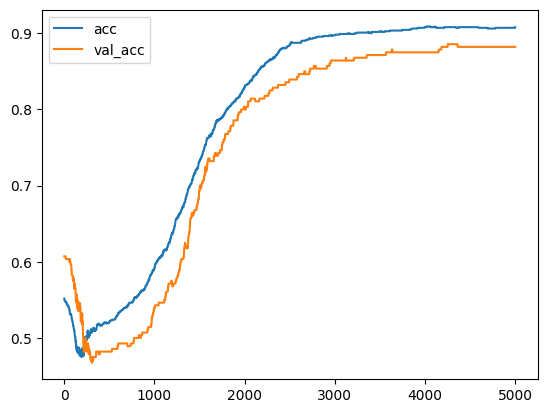

In [9]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()